In [1]:
import os
import glob
import random
import skimage

import matplotlib.lines as lines
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import mr

In [4]:
from mrcnn import model as modellib, utils
from mrcnn import visualize

Using TensorFlow backend.


In [5]:
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size * cols, size * rows))
    return ax

config = mr.TrainConfig()
config.display()

In [6]:
work_path = os.path.join("E:", os.sep, "RCNNPipes448Train")
work_path = os.path.expanduser("~/Tanks_512")
os.chdir(work_path)

In [7]:
dataset = mr.MRDataset()
dataset.load(work_path)
dataset.prepare()

In [8]:
print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 73
Class Count: 2
  0. BG                                                
  1. Tank                                              


Below is a quick hack (avg of avg, is not right :-)

In [9]:
avg0 = []
avg1 = []
avg2 = []

tif_glob = glob.glob(os.path.join(work_path, "*", "images", "*.tif"))
for tif_file in tif_glob:
    tif_image = skimage.io.imread(tif_file)
    avg0.append(np.average(tif_image[:,:,0]))
    avg1.append(np.average(tif_image[:,:,1]))
    avg2.append(np.average(tif_image[:,:,2]))
        
print("MEAN_PIXEL = np.array([{:.1f}, {:.1f}, {:.1f}])".format(np.average(avg0), np.average(avg1), np.average(avg2)))

MEAN_PIXEL = np.array([124.3, 121.1, 119.6])


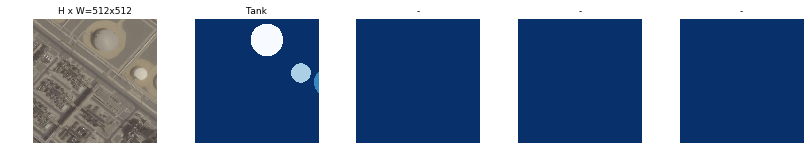

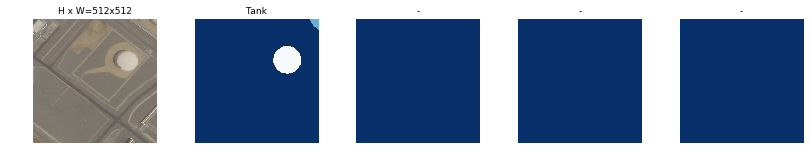

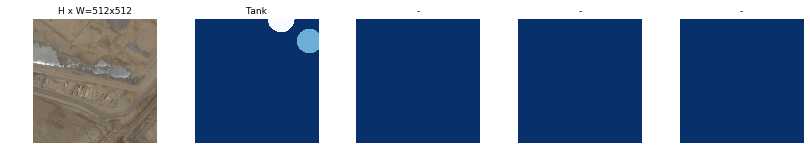

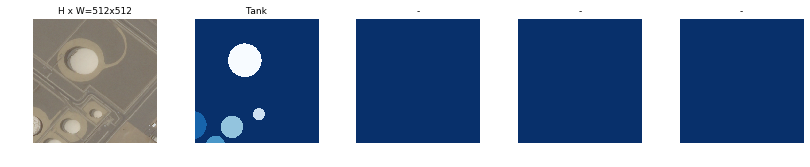

In [12]:
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    # print(image_id)
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

54 /Users/mraad/Tanks_512/images/9216_6400.png
[1 1 1 1 1 1 1 1]
[[  0  69  18 132]
 [  0 290  16 335]
 [ 65   0 119  25]
 [459 297 512 452]
 [315 423 485 512]
 [179 247 351 420]
 [326 112 498 285]
 [ 27 421 165 512]]


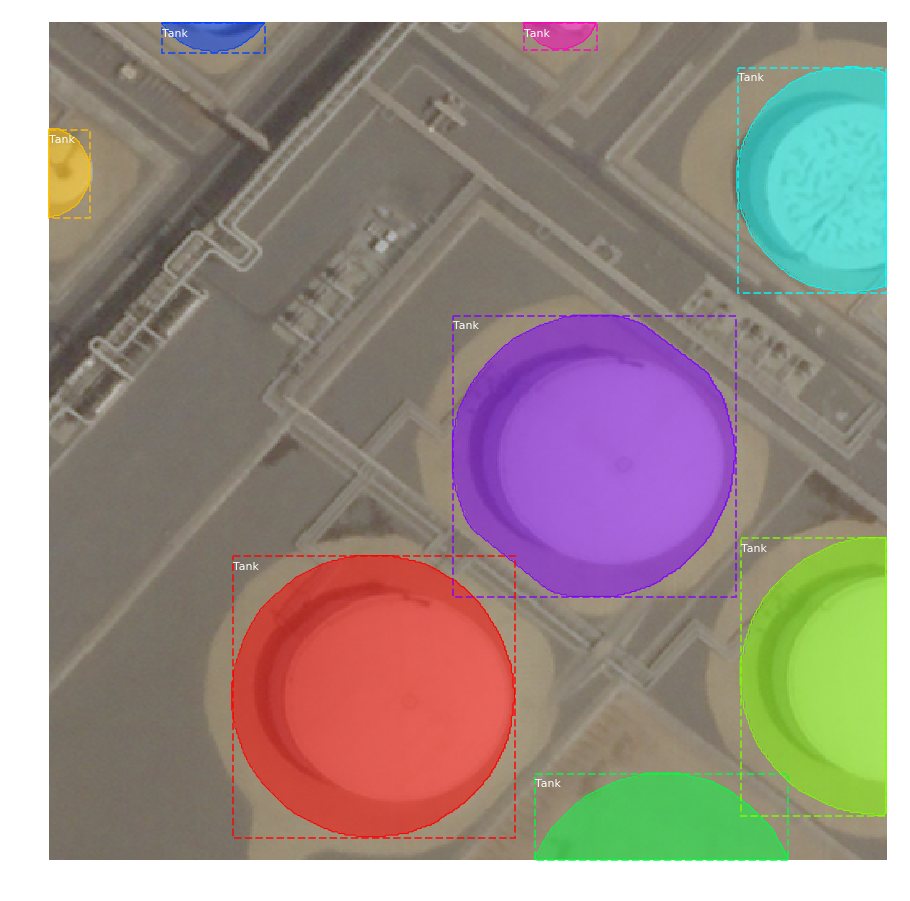

In [23]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)
# Display image and additional stats
print(image_id, dataset.image_reference(image_id))
print(class_ids)
print(bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)